# **DESAFÍO ED MACHINA**
Alen Jiménez - Febrero 2024

**DATA WRANGLING (DW)**

El objetivo de esta notebook es hacer una primera exploración del dataset y transformarlo para ser utilizado en las etapas de EDA y de ML.

# Tabla de Contenidos
* 0. [Set Up General](#set_up_general)
* 1. [Exploración General del Dataset](#exploracion_general_dataset)
* 2. [Edición para Tabla Final](#edicion_para_tabla_final)

# 0. Set Up General<a class = 'anchor' id = 'set_up_general'></a>

In [1]:
# Importamos bibliotecas

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import altair as alt
import re
import scipy
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# Directorio de trabajo

directorio_de_trabajo = 'C:/Users/alenj/Escritorio/proyectos/desafio_edmachina'

os.chdir(directorio_de_trabajo)

print(f'Directorio actual de trabajo: {os.getcwd()}')

Directorio actual de trabajo: C:\Users\alenj\Escritorio\proyectos\desafio_edmachina


# 1. Exploración General del Dataset <a class = 'anchor' id = 'exploracion_general_dataset'></a>

In [3]:
# Importamos el csv

df = pd.read_csv('challenge_MLE.csv', sep = ';', encoding = 'utf-8')

In [4]:
# Vemos la cantidad de filas y columnas

print(f'El dataset original tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataset original tiene 196124 filas y 24 columnas.


In [5]:
# Información del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   fecha_mesa_epoch    7010 non-null    float64
 4   nombre_examen       7010 non-null    object 
 5   nota_parcial        7010 non-null    float64
 6   assignment_id       26061 non-null   float64
 7   ass_name            26061 non-null   object 
 8   ass_created_at      26061 non-null   float64
 9   ass_due_at          26061 non-null   float64
 10  ass_unlock_at       24760 non-null   float64
 11  ass_lock_at         25979 non-null   float64
 12  points_possible     26061 non-null   float64
 13  ass_name_sub        24206 non-null   object 
 14  sub_uuid            24206 non-null   object 
 15  score               23876 non-null

In [6]:
# Cantidad de estudiantes únicos

df.user_uuid.nunique()

600

In [7]:
# Cantidad de periodos

df.periodo.value_counts()

periodo
1-2022     187854
01-2022      7730
2-2022        540
Name: count, dtype: int64

In [8]:
# Cantidad de materias

print(f'Cantidad de materias únicas: {df.course_uuid.nunique()}\n')

Cantidad de materias únicas: 582



Observaciones:
- La medición de las características incluidas en la tabla depende de la existencia de un historial académico.
- Es decir, es muy dificil estimar la probabilidad de aprobación de estudiantes nuevos, sin historial, usando los datos disponibles en la tabla.
- La tabla no incluye características sociodemográficas o de contexto del estudiante como por ejemplo el sexo, la edad, el nivel educativo, el lugar de residencia, características de los padres, etc.

In [9]:
# Caracteristicas de la partición

df.particion.describe()

count    196124.000000
mean         30.663891
std          17.625074
min           0.000000
25%          15.000000
50%          31.000000
75%          46.000000
max          59.000000
Name: particion, dtype: float64

In [10]:
# Vemos la cantidad de duplicados al nivel que propone el ejercicio

df.duplicated(['user_uuid','course_uuid','particion']).value_counts()

False    178140
True      17984
Name: count, dtype: int64

In [11]:
# Materias que se evalúan

print(f'Cantidad de materias únicas: {df.course_uuid.nunique()}\n')
print(f'Nombre de materias según frecuencia absoluta:\n\n{df.course_name.value_counts()}')

Cantidad de materias únicas: 582

Nombre de materias según frecuencia absoluta:

course_name
Intuitive non-volatile ability                11439
Object-based leadingedge help-desk            10341
Face-to-face regional concept                  4555
Stand-alone upward-trending secured line       4262
Total radical adapter                          3537
                                              ...  
Monitored regional artificial intelligence       60
Grass-roots national middleware                  60
Multi-channeled homogeneous policy               60
Operative fresh-thinking knowledge user          60
Operative systematic help-desk                   60
Name: count, Length: 561, dtype: int64


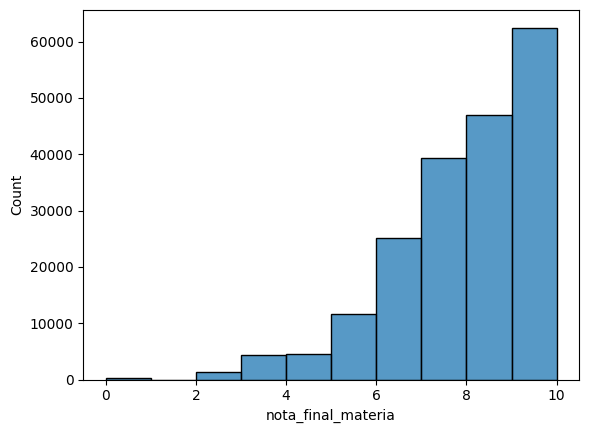

In [12]:
# Histograma de nota final de materia

sns.histplot(data = df, x = 'nota_final_materia', bins = 10);

In [13]:
# Tipos de examenes

df['nombre_examen'].value_counts()

nombre_examen
SEGUNDO PARCIAL(20)                  3213
PRIMER PARCIAL(20)                   3067
INTEGRADOR(30)                        356
RECUPERATORIO PRIMER PARCIAL(20)      242
RECUPERATORIO SEGUNDO PARCIAL(20)     132
Name: count, dtype: int64

In [14]:
# Cantidad maxima de puntos en actividad

df.points_possible.value_counts()

points_possible
100.0    25954
0.0         97
10.0        10
Name: count, dtype: int64

In [15]:
# Nombre de actividad
 
df.ass_name.value_counts()

ass_name
Actividad Práctica Integradora 4 [API4]                                          3272
Trabajo Práctico 2 [TP2]                                                         3208
Trabajo Práctico 1 [TP1]                                                         3087
Actividad Práctica Integradora 1 [API1]                                          3026
Actividad Práctica Integradora 3 [API3]                                          2973
Actividad Práctica Integradora 2 [API2]                                          2967
Trabajo Práctico 3 [TP3]                                                         2577
Trabajo Práctico 4 [TP4]                                                         2484
Trabajo Práctico 3 - Diagnóstico [ED3]                                            591
Trabajo Práctico 4 - Diagnóstico [ED4]                                            591
Trabajo práctico 3 [TP3]                                                           99
Trabajo práctico 4 [TP4]                     

In [16]:
# Nombre de actividad

df.ass_name_sub.value_counts()

ass_name_sub
Trabajo Práctico 2 [TP2]                   2861
Trabajo Práctico 1 [TP1]                   2738
Actividad Práctica Integradora 1 [API1]    2638
Actividad Práctica Integradora 2 [API2]    2590
Actividad Práctica Integradora 3 [API3]    2543
                                           ... 
Examen de suficiencia                         1
Entregable grupal 1                           1
Entregable Grupal 2                           1
Entregable Grupal 3                           1
Entregable Grupal 4                           1
Name: count, Length: 91, dtype: int64

In [17]:
# Cantidad de periodos

df.periodo.value_counts()

periodo
1-2022     187854
01-2022      7730
2-2022        540
Name: count, dtype: int64

In [18]:
# Extraemos el semestre de la columna periodo

def asigna_semestre(valor):
    if valor.startswith('1') or valor.startswith('01'):
        return 1
    elif valor.startswith('2') or valor.startswith('02'):
        return 2
    else:
        return None

df['semestre'] = df['periodo'].apply(asigna_semestre)

# Extraemos el anio de la columna periodo

def extraer_anio(valor):
    return valor[-4:]

df['anio'] = df['periodo'].apply(extraer_anio)

# Armamos columna de periodo

df['periodo'] = df.anio+df.semestre.astype('str')
df['periodo'].value_counts()

periodo
20221    195584
20222       540
Name: count, dtype: int64

In [19]:
# Cantidad de semestres cursados por estudiantes

periodos_por_estudiante = df.groupby('user_uuid').periodo.nunique()
periodos_por_estudiante.value_counts()

periodo
1    591
2      9
Name: count, dtype: int64

Apenas 9 estudiantes en la tabla cursaron ambos semestres de 2022.

In [20]:
# Cantidad de cursos tomados por estudiantes

cursos_por_estudiante = df.groupby('user_uuid').course_uuid.nunique()
cursos_por_estudiante.describe()

count    600.000000
mean       4.948333
std        1.993059
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       16.000000
Name: course_uuid, dtype: float64

<Axes: xlabel='course_uuid', ylabel='Count'>

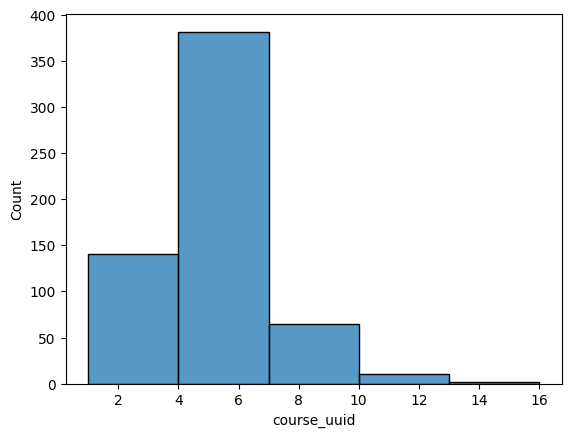

In [21]:
sns.histplot(data=cursos_por_estudiante, bins = 5)

Vemos si el promedio de notas parciales determina la nota final

In [22]:
promedios_parciales = df.groupby(['user_uuid','periodo','course_uuid'], as_index=False).\
    agg({'nota_final_materia':'first','nota_parcial':np.mean})
promedios_parciales.dropna(inplace = True)

promedios_parciales['nota_parcial_round'] = np.ceil(promedios_parciales['nota_parcial'])
promedios_parciales['diferencia'] = promedios_parciales['nota_final_materia'] - promedios_parciales['nota_parcial_round']
promedios_parciales['diferencia'].describe()

count    2763.000000
mean       -0.040174
std         0.885669
min       -10.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: diferencia, dtype: float64

In [23]:
# Vemos cuántos casos tenemos que la nota final difiere del promedio redondeado de notas parciales

parcial_difiere_final = promedios_parciales['diferencia']>0
parcial_difiere_final.value_counts()

diferencia
False    2469
True      294
Name: count, dtype: int64

En 294 cursadas la nota final difiere del promedio de notas parciales.

In [24]:
# Vemos cuántos casos tenemos de que desaprobo parciales y aprobo la materia

desaprobo_parciales = promedios_parciales.nota_parcial_round < 4
aprobo_materia = promedios_parciales.nota_final_materia >= 4
inconsistencias = np.logical_and(desaprobo_parciales,aprobo_materia)
inconsistencias.value_counts()

False    2753
True       10
Name: count, dtype: int64

En 10 cursadas el promedio de notas parciales es inferior a 4, pero la cursada fue aprobada.

In [25]:
df.head()

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,semestre,anio
0,0,20221,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,1,2022
1,1,20221,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,1,2022
2,2,20221,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,1,2022
3,3,20221,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,1,2022
4,4,20221,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,1,2022


# 2. Edición para tabla final <a class = 'anchor' id = 'edicion_para_tabla_final'></a>

In [26]:
# Creamos id de estudiante, materia y periodo

df['id'] = pd.factorize(df['user_uuid'].astype(str) + df['periodo'].astype(str) + df['course_uuid'].astype(str))[0]

df['id'] = df['id'].astype(int)

df['id'].describe()

count    196124.000000
mean       1481.454534
std         856.854720
min           0.000000
25%         739.000000
50%        1477.000000
75%        2223.250000
max        2968.000000
Name: id, dtype: float64

In [27]:
# Creamos la columna dias hasta primer examen

df['dias_hasta_primer_examen'] = np.nan

boolean_primer_examen_tomado = df.nombre_examen=='PRIMER PARCIAL(20)'

df.loc[boolean_primer_examen_tomado,'dias_hasta_primer_examen'] = df.loc[boolean_primer_examen_tomado,'particion']



Para simplificar, vamos a tomar los casos que rindieron el primer parcial.

In [28]:
# Vemos cantidad de cursadas en tabla
 
df.id.nunique()

2969

In [29]:
# Vemos cuantas cursadas no tuvieron primer examen

dfaux = df.groupby('id').dias_hasta_primer_examen.nunique()
dfaux.rename('tuvo_primer_examen', inplace = True)
dfaux.value_counts()

tuvo_primer_examen
1    2638
0     331
Name: count, dtype: int64

En 331 cursadas se observa que no se rindió el primer parcial.

In [30]:
# Nos quedamos con las cursadas que tuvieron primer examen

df = df.merge(dfaux.reset_index(), how = 'inner', on = 'id')
df = df[df.tuvo_primer_examen==1]
df.reset_index(drop = True, inplace = True)

Ahora vamos a identificar las filas que se corresponden con el período previo al primer examen

In [31]:
# Armos dummy del periodo del primer examen

df['periodo_previo_primer_examen'] = 0

ids = list(df.id.unique())

for id in ids:
    
    boolean_id = (df.id==id)

    boolean_dias = np.logical_and(boolean_id, ~df.dias_hasta_primer_examen.isnull())

    dias = float(df.loc[boolean_dias,'dias_hasta_primer_examen'].unique())
    
    '''OBSERVACION IMPORTANTE
    hay que poner unique() porque hay cursos en los que hubo más de 
    una actividad (tp, integradora) en el mismo dia de examen primero
    con lo cual hay filas duplicadas para ese mismo dia de cursada.'''
    
    boolean_particion = np.logical_and(boolean_id, df['particion'] <= dias)

    df.loc[boolean_particion,'periodo_previo_primer_examen'] = 1
    
    if id==ids[-1]:
        print('Terminado')

Terminado


In [32]:
# Nos quedamos con las filas que corresponden al periodo previo al primer examen

df1 = df[df.periodo_previo_primer_examen==1]
df1.reset_index(drop = True, inplace = True)

Construimos features

In [33]:
# Dummy Semestre 2

df1['semestre_2'] = np.where(df1['semestre']==2, 1, 0)

# Aprobo curso

df1['aprobo'] = np.where(df1['nota_final_materia']>=4, 1, 0)

In [34]:
# Aparte: Caracteristicas de actividades (tp, integradora, etc)

'''Como vamos a construir indicadores en base a informacion que no se encuentra en la misma fila,
deberemos armar esta parte por separado, ya que las caracteristicas de una misma actividad (tp, integradora, etc)
aparecen en distintias filas para una misma cursada.''';

In [35]:
# Identificamos las columnas que tienen información sobre las actividades desarrolladas durante la cursada

columns1 = ['id','ass_name_sub', 'sub_uuid', 'score','submission_type', 's_submitted_at', 's_graded_at', 's_created_at']
columns2 = ['id','assignment_id', 'ass_name','ass_created_at', 'ass_due_at', 'ass_unlock_at', 'ass_lock_at','points_possible']

In [36]:
'''Agarro todas las actividades que hayan tenido score antes del primer parcial.
Para eso agarro el df del periodo del primer parcial (df1), y tomo esas actividades'''

df11 = df1[columns1]
df11.dropna(inplace=True)
df11.drop_duplicates(inplace=True, ignore_index= True)

In [37]:
'''
Como hay desfasaje de la informacion de las actividades, presentando info en distintas filas,
entonces puede pasar que una actividad que tuvo score antes del primer examen, tenga info
en la tabla en un periodo posterior al primer examen.
Entonces, tomamos el df general (df), con info del periodo del primer y post primer examen, para buscar esa info adicional.
'''

df12 = df[columns2]
df12.dropna(inplace=True)
df12.drop_duplicates(inplace=True, ignore_index= True)


In [38]:
# Unimos las bases

df2 = df11.merge(df12, how = 'left'
                 , left_on = ['id','ass_name_sub']
                 , right_on = ['id','ass_name'])

In [39]:
df2.shape

(8186, 15)

In [40]:
df11.shape

(8131, 8)

In [41]:
df12.shape

(20058, 8)

In [42]:
# Calculamos el tiempo entre la submision y el unlock, y tomamos el promedio para cada cursada

df2['tiempo_hasta_submision'] = df2['s_submitted_at']-df2['ass_unlock_at']

df2 = df2.groupby('id', as_index = False).tiempo_hasta_submision.mean()


In [43]:
# Unimos con la informacion original en df1
 
df3 = df1.merge(df2, how = 'left', on = 'id')

In [44]:
# Agrupamos el df por id, seleccionando un conjunto de medidas

df4 = df3.groupby('id').agg({'user_uuid':'first'
                            ,'periodo':'first'
                            ,'course_uuid':'first'
                            ,'dias_hasta_primer_examen':'first'
                            ,'semestre_2':'first'
                            ,'aprobo':'first'
                            ,'nota_parcial':'first'
                            ,'score':'mean'
                            ,'tiempo_hasta_submision':'first'
})

df4.reset_index(drop=False, inplace = True)

df4.head()

,id,user_uuid,periodo,course_uuid,dias_hasta_primer_examen,semestre_2,aprobo,nota_parcial,score,tiempo_hasta_submision
0,0,13df535e-065c-4593-98ea-5b1e29015b7d,20221,09614210-fce2-48bc-93e3-bc4bd441fe00,28.0,0,1,8.0,90.000000,2.005721e+06
1,1,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,20221,14d11dfe-01d7-4c8a-8489-59cce7e2d051,21.0,0,1,4.0,78.333333,5.206823e+05
2,3,04ad5b31-4753-4c60-b413-38541c305811,20221,9fb5bf9b-b5e3-40ef-b69e-8681fa52cb8d,27.0,0,1,8.0,96.150000,2.551589e+06
3,4,53e6f60f-188c-430d-b4c9-7452395ff17f,20221,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,17.0,0,1,4.0,100.000000,7.507380e+05
4,5,151e0c8e-2ede-4fe3-b878-3794e946c1ac,20221,36e2d84b-246d-4086-8ea9-d3586592b476,28.0,0,1,6.0,68.000000,1.108199e+06


In [45]:
# Especificar la ruta de la carpeta
carpeta_path = directorio_de_trabajo + '\output'

# Verificar si la carpeta existe y crearla si no
if not os.path.exists(carpeta_path):
    os.makedirs(carpeta_path)

# Especificar la ruta completa del archivo dentro de la carpeta
archivo_path = os.path.join(carpeta_path, 'output_dw.csv')

# Guardar el DataFrame en un archivo CSV
df4.to_csv(archivo_path, index=False)